In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from datetime import datetime
import warnings

plt.style.use('ggplot')

In [68]:
df = pd.read_csv('bikeStats.csv')
df = df.drop(['Type', '/km'], axis=1)
df['CumSum'] = df['km'].cumsum()
df

,ISO,Duration,bpm-Avg.,bpm-%,bpm-hi,Cals,Cals/h,km,km/h,Date,CumSum
0,2023-07-24 10:59:38-04:00,1.209444,135.6,70.8,188.0,277.1,229.1,17.31,14.3,2023-07-24,17.31
1,2023-07-25 13:38:31-04:00,2.281111,143.6,74.9,182.0,661.4,290.0,35.16,15.4,2023-07-25,52.47
2,2023-07-31 14:54:55-04:00,1.305556,134.9,70.4,159.0,579.7,444.0,24.80,19.0,2023-07-31,77.27
3,2023-08-01 16:04:41-04:00,1.683611,147.1,76.8,181.0,828.8,492.2,35.03,20.8,2023-08-01,112.30
4,2023-08-16 10:27:13-04:00,1.607778,140.9,73.6,185.0,713.8,443.9,31.50,19.6,2023-08-16,143.80
5,2023-09-16 12:52:16-04:00,1.160833,148.9,77.7,186.0,553.9,477.2,25.30,21.8,2023-09-16,169.10
6,2023-09-20 12:31:46-04:00,1.772500,153.8,80.3,185.0,1012.0,570.9,37.65,21.2,2023-09-20,206.75


In [69]:
def med(df, col, deci=None):
    median = round(df[col].median(),deci)
    return median

def avg(df, col, deci=None):
    average = round(df[col].mean(), deci)
    return average

def max(df, col, deci=None):
    maximum = round(df[col].max(),deci)
    return maximum

def sum(df, col, deci=None):
    total = round(df[col].sum(),deci)
    return total

def midp(df, col):
    midpoint = (df[col].max() + df[col].min()) / 2
    return midpoint

def rolla(df, col, windw):
    rolling_average = df[col].rolling(window=windw).mean()
    return rolling_average

def rnd(val, deci):
    new = round(val, deci)
    return new

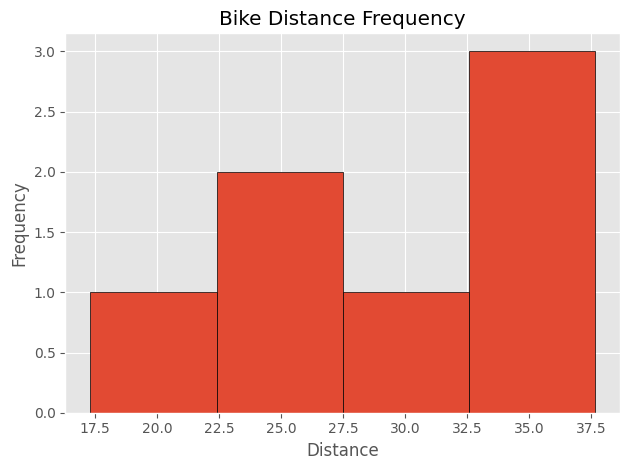

In [70]:
plt.hist(df['km'], bins='auto', edgecolor='black')
plt.title('Bike Distance Frequency')
plt.xlabel('Distance')
plt.ylabel('Frequency')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Graphs/BDistance Frequency.png', dpi=600)
plt.show()

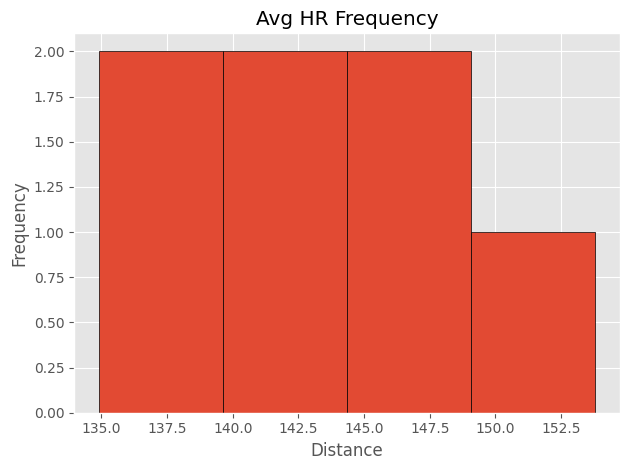

In [71]:
plt.hist(df['bpm-Avg.'], bins='auto', edgecolor='black')
plt.title('Avg HR Frequency')
plt.xlabel('Distance')
plt.ylabel('Frequency')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Graphs/BHR Frequency.png', dpi=600)
plt.show()

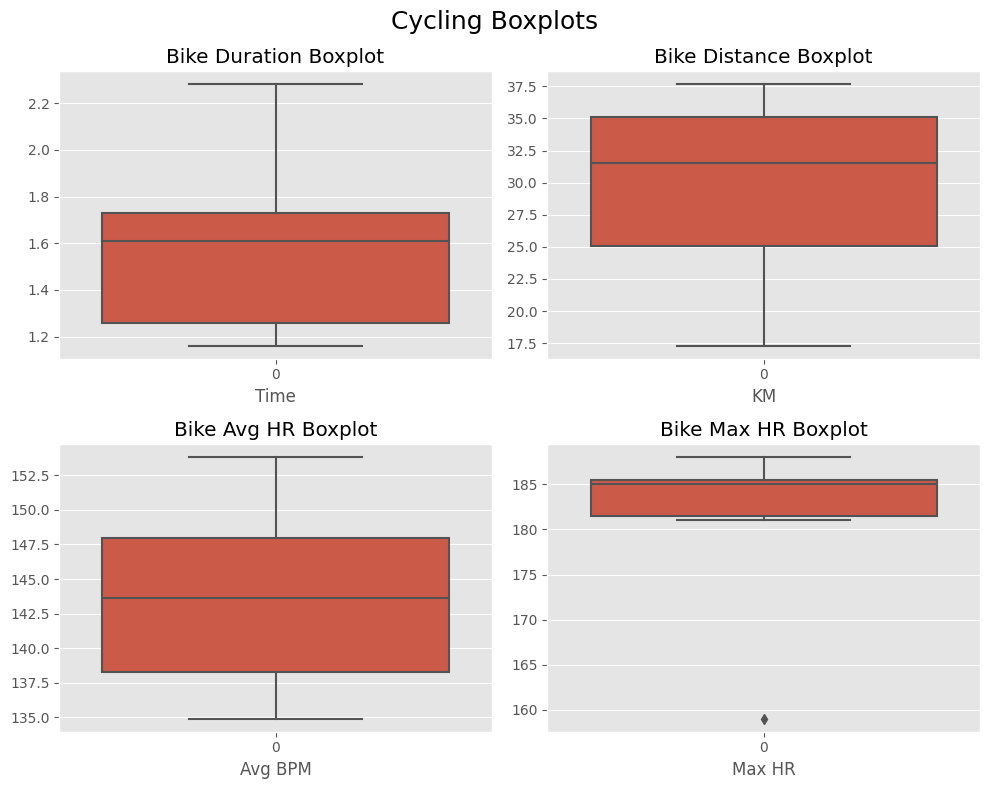

In [72]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Run Duration Boxplot
sns.boxplot(df['Duration'], ax=axes[0, 0])
axes[0, 0].set_title('Bike Duration Boxplot')
axes[0, 0].set_xlabel('Time')
# Run Distance Boxplot
sns.boxplot(df['km'], ax=axes[0, 1])
axes[0, 1].set_title('Bike Distance Boxplot')
axes[0, 1].set_xlabel('KM')
# Run Average HR Boxplot
sns.boxplot(df['bpm-Avg.'], ax=axes[1, 0])
axes[1, 0].set_title('Bike Avg HR Boxplot')
axes[1, 0].set_xlabel('Avg BPM')
# Run Max HR Boxplot
sns.boxplot(df['bpm-hi'], ax=axes[1, 1])
axes[1, 1].set_title('Bike Max HR Boxplot')
axes[1, 1].set_xlabel('Max HR')

fig.suptitle('Cycling Boxplots', fontsize=18)

plt.tight_layout()
plt.savefig('Graphs/Bike Boxplots.png', dpi=600)
plt.show()